<a href="https://colab.research.google.com/github/anderson-perez/Aulas-de-IEC/blob/main/Aula_22_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Continuação de Árvore de Decisão.
* Avaliação do algoritmo;
* Ajustes dos hiperparâmetros com GridSearch.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('/content/breast-cancer.csv')

In [3]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X = dados.iloc[:, 2:-1].values
y = dados.iloc[:, 1].values

In [5]:
X.shape, y.shape

((569, 29), (569,))

In [6]:
from sklearn.model_selection import train_test_split

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

In [19]:
y_treino.shape, y_teste.shape

((426,), (143,))

In [20]:
X_treino.shape, X_teste.shape

((426, 29), (143, 29))

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
arvore = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
arvore.fit(X_treino, y_treino)

In [23]:
predicoes = arvore.predict(X_teste)

In [41]:
arvore.score(X_teste, y_teste)

0.8951048951048951

In [42]:
from sklearn import tree

[Text(0.5769230769230769, 0.875, 'x[22] <= 114.45\ngini = 0.456\nsamples = 426\nvalue = [276, 150]'),
 Text(0.3076923076923077, 0.625, 'x[27] <= 0.151\ngini = 0.149\nsamples = 297\nvalue = [273.0, 24.0]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[13] <= 35.435\ngini = 0.088\nsamples = 282\nvalue = [269, 13]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.46153846153846156, 0.375, 'x[4] <= 0.108\ngini = 0.391\nsamples = 15\nvalue = [4, 11]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.8461538461538461, 0.625, 'x[7] <= 0.046\ngini = 0.045\nsamples = 129\nvalue = [3, 126]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[21] <= 26.03\ngini = 0.49\nsamples = 7\nvalue = [3,

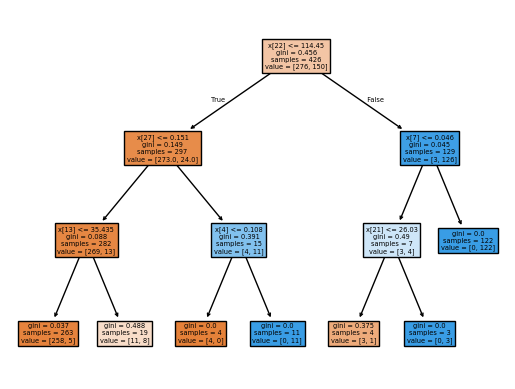

In [45]:
tree.plot_tree(arvore, filled=True)

In [25]:
# Prever a saída para o primeiro registro de X_teste
X_teste[0]

array([9.742e+00, 1.912e+01, 6.193e+01, 2.897e+02, 1.075e-01, 8.333e-02,
       8.934e-03, 1.967e-02, 2.538e-01, 7.029e-02, 6.965e-01, 1.747e+00,
       4.607e+00, 4.352e+01, 1.307e-02, 1.885e-02, 6.021e-03, 1.052e-02,
       3.100e-02, 4.225e-03, 1.121e+01, 2.317e+01, 7.179e+01, 3.809e+02,
       1.398e-01, 1.352e-01, 2.085e-02, 4.589e-02, 3.196e-01])

In [31]:
y_teste[120]

'M'

In [37]:
arvore.predict([X_teste[120]])

array(['M'], dtype=object)

In [38]:
arvore.predict_proba([X_teste[120]])

array([[0., 1.]])

In [62]:
import matplotlib.pyplot as plt

In [65]:
%matplotlib inline

In [66]:
fig = tree.export_graphviz(decision_tree=arvore, filled=True)

In [67]:
plt.show(fig)

# CrossValidation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross = cross_val_score(arvore, X_treino, y_treino, cv=5)

In [50]:
cross

array([0.94186047, 0.94117647, 0.94117647, 0.95294118, 0.92941176])

In [51]:
arvore.set_params(criterion='gini', max_depth=3)

DecisionTreeClassifier(max_depth=3)

# GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
parametros = {'criterion': ('entropy', 'gini'),
              'max_depth': [3, 4, 5],
              'min_samples_split': [2, 3, 4]}

In [54]:
gscv = GridSearchCV(arvore, parametros, cv=10)

In [ ]:
gscv.fit(X_treino, y_treino)

In [ ]:
gscv.best_estimator_

In [57]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}

In [58]:
gscv.best_score_

np.float64(0.9341638981173865)

# Teste com KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

# Teste com LogisticRegressor

In [60]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LogisticRegression()